<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


pm.__version__='3.11.5'


/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_70546/3676113808.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


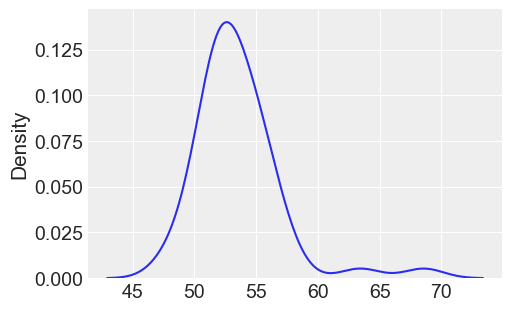

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm
import arviz as az
import pandas as pd 
print(f"{pm.__version__=}")
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
az.style.use("arviz-darkgrid")
pd.set_option("display.precision", 2)
rng = np.random.default_rng(42)

data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 
    55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 
    57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94,
    54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84,
    53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16
])

plt.figure(figsize=(5,3))
sns.kdeplot(data)
plt.savefig("img302.png")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 1_000 tune and 1_100 draw iterations (1_000 + 1_100 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

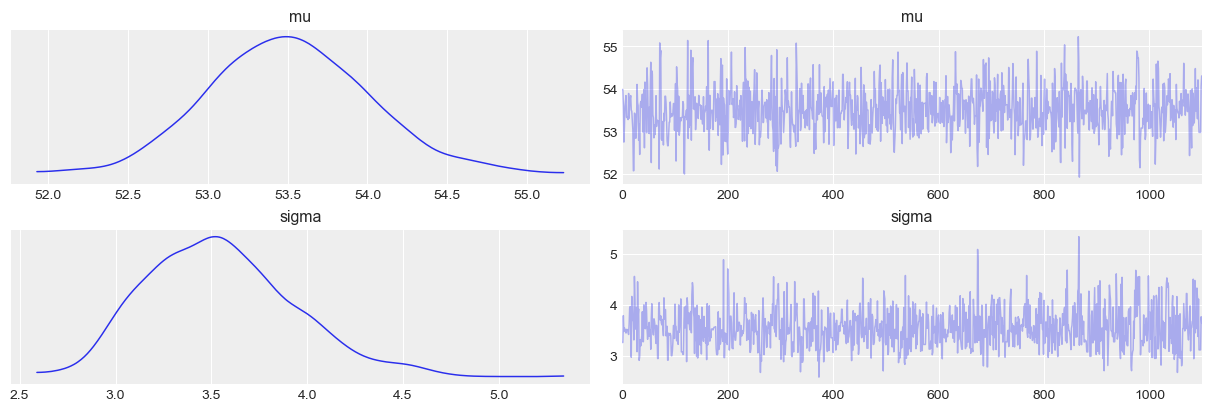

In [2]:
with pm.Model() as model_g:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    # pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    # idata = pm.sample_prior_predictive(samples=100, random_seed=rng)
    trace_g = pm.sample(draws=1100, chains=1, return_inferencedata=False)
    # chain_g = trace_g[100:]

# chain_g = trace_g[100:]
# pm.traceplot(chain_g)
az.plot_trace(trace_g)

In [3]:
# df = pm.summary(trace_g)   # az.summary(trace_g)でも可
az.summary(trace_g)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 1100), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.51,0.53,52.58,54.61,0.02,0.01,917.0,706.0,NaN
sigma,3.55,0.39,2.89,4.28,0.01,0.01,687.0,572.0,NaN


In [4]:
# with model_g:
#     pm.sample_posterior_predictive(idata, 
#                                    extend_inferencedata=True,
#                                    random_seed=rng,
#                                 #    var_names=["mu", "sigma"],
#                                    )
# # az.plot_ppc(az.from_pymc3(posterior_predictive=y_pred, model=model_g))
# # print(y_pred["posterior_predictive"]["mu"].shape)
# # print(y_pred.keys())
# idata.posterior_predictive

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


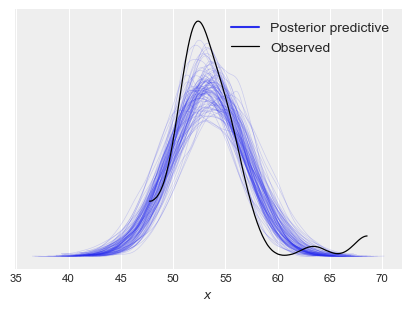

In [5]:
y_pred = pm.sample_posterior_predictive(trace_g, 100, model_g, size=len(data))
# sns.kdeplot(data, c="b")
# for i in y_pred["y"]:
#     sns.kdeplot(i, c="r", alpha=0.1)
# plt.xlim(35, 75)
# plt.title("Gaussian Model", fontsize=12)
# plt.xlabel("$x", fontsize=12)
# plt.savefig("img305.png")

tips_normal = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred)
axes = az.plot_ppc(tips_normal, figsize=(4,3), mean=False)
axes.set_xlabel("$x$")
axes.legend(fontsize=10)
plt.savefig("img305.png")
plt.show()


↑ まだまだ良い矜持とは言えない。`Observed`データの右端にあるデータに対して事後分布がうまく近似できてないことを意味する。

## 3.2.2 頑健推論

In [6]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

3.235752619569614

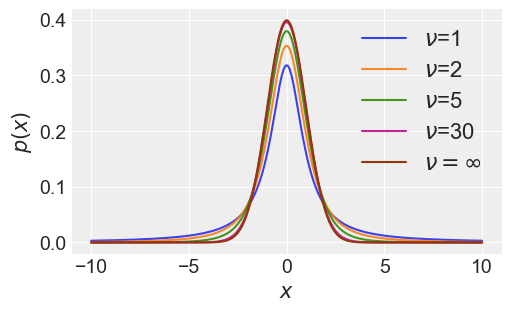

In [7]:
# さまざまなt分布をプロットする
plt.figure(figsize=(5,3))
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, 
             label=r"$\nu$={}".format(df),
             alpha=0.9)

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu=\infty$')
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(loc=0, fontsize=16)

### t分布を含むモデルのKDEとトレースプロット


/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, mu]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.

Sampling 4 chains for 100 tune and 1_100 draw iterations (400 + 4_400 draws total) took 8 seconds.
The acceptance probability does not match the target. It is 0.929555288263603, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9408548221710482, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9225718523736788, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9456166604109314, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3`

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.01,0.38,52.28,53.70,6.00e-03,4.00e-03,4607.0,3023.0,1.0
sigma,2.19,0.40,1.47,2.94,1.10e-02,7.00e-03,1464.0,1867.0,1.0
nu,4.50,3.06,1.01,9.12,1.08e-01,8.00e-02,1060.0,951.0,1.0


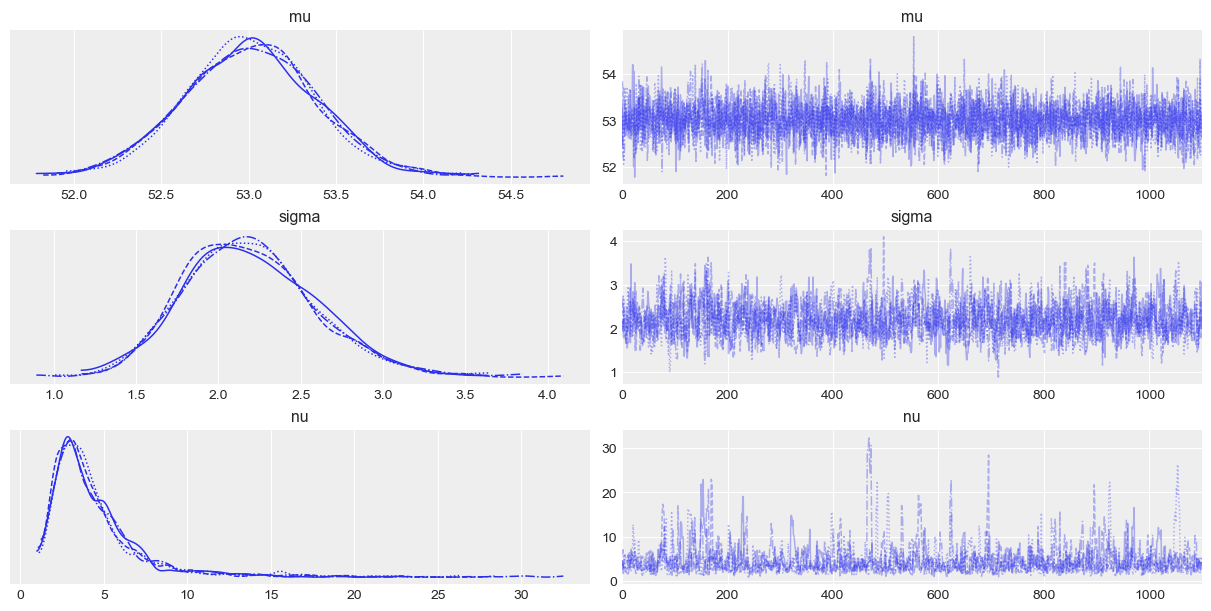

In [8]:
nburn=100
with pm.Model() as model_t:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sigma=10)
    nu = pm.Exponential("nu", 1/30)
    y = pm.StudentT("y", mu=mu, sigma=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100, tune=nburn, discard_tuned_samples=True)
    # idata = pm.sample_prior_predictive(samples=100, random_seed=rng)

az.plot_trace(trace_t)
pm.summary(trace_t)

### データのKDEと100組の事後予測サンプルのKDE


/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


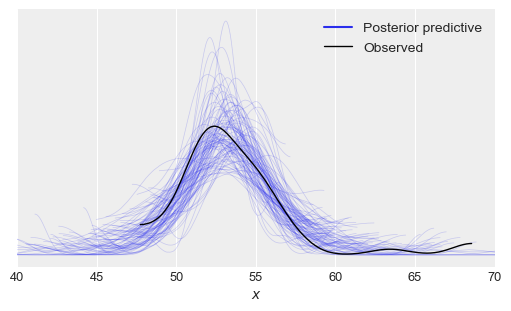

In [9]:
# fig, ax = plt.subplots()
# sns.kdeplot(data, c="r", ax=ax, label="True")
# az.plot_ppc(idata, num_pp_samples=60, ax=ax)
y_ppc_t = pm.sample_posterior_predictive(
    trace_t, 100, model_t)
y_pred_t = az.from_pymc3(trace=trace_t, posterior_predictive=y_ppc_t)
ax = az.plot_ppc(y_pred_t, figsize=(5,3), mean=False)
ax.set_xlabel("$x$")
ax.legend(fontsize=10)
ax.set_xlim([40, 70])
plt.savefig("img309.png")
plt.show()


↑ `Observed`の右端にある外れ値データに対しても事後分布がうまく近似できていることを示唆している。これが頑健推論の効果。

## Comparison between group
- 

In [10]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


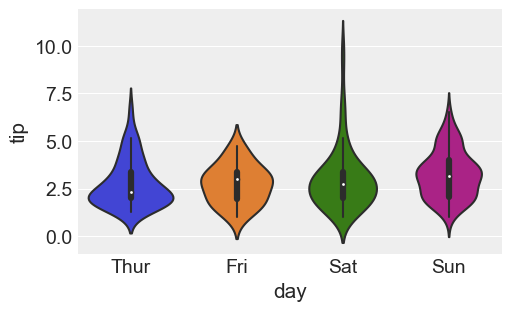

In [11]:
plt.figure(figsize=(5,3))
sns.violinplot(x="day", y="tip", data=tips)
plt.savefig("img310.png")

In [12]:
tip = tips["tip"].values
idx = pd.Categorical(tips["day"]).codes
groups = len(np.unique(idx))

print(f"{y[:10]=}")
print(f"{idx[:10]=}")
print(f"{np.unique(idx)=}")

y[:10]=Subtensor{:int64:}.0
idx[:10]=array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int8)
np.unique(idx)=array([0, 1, 2, 3], dtype=int8)


/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sds, means]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.c

Sampling 4 chains for 100 tune and 5_000 draw iterations (400 + 20_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.8982341142763606, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8985607130356092, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9116432751263812, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9004032854869378, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using th

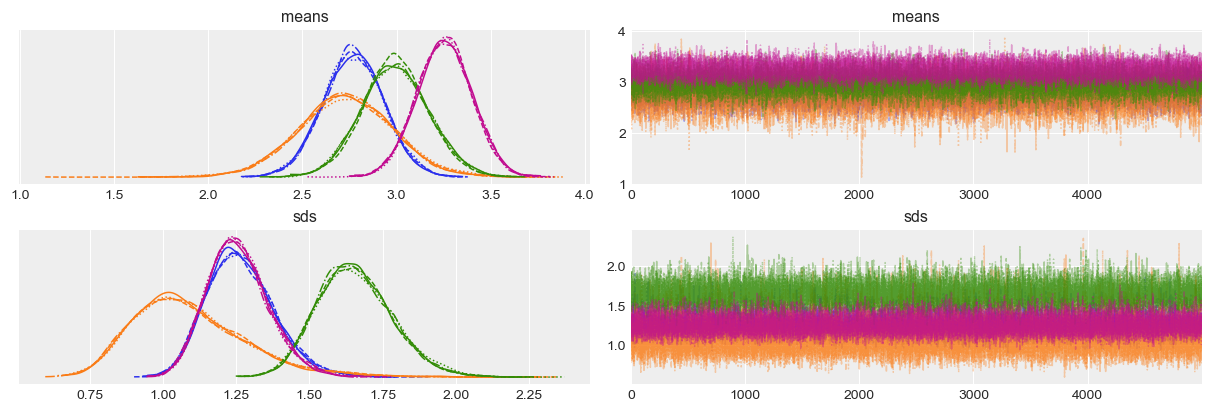

In [13]:
with pm.Model() as comparing_groups:
    means = pm.Normal("means", mu=0, sigma=10, shape=groups)
    sds = pm.HalfNormal("sds", sigma=10, shape=groups)
    y = pm.Normal("y", mu=means[idx], sigma=sds[idx], observed=tip)

    trace_cg = pm.sample(draws=5000, tune=nburn, discard_tuned_samples=True)
    # chain_cg = trace_cg[100::]  # 後で可視化するために使う
    # idata = pm.sample_prior_predictive(samples=2000, random_seed=rng)

az.plot_trace(trace_cg)
plt.savefig("img311.png")

In [14]:
az.summary(trace_cg)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
means[0],2.77,0.16,2.46,3.07,1.00e-03,1.00e-03,29457.0,15181.0,1.0
means[1],2.73,0.25,2.25,3.20,2.00e-03,1.00e-03,17562.0,13238.0,1.0
means[2],2.99,0.18,2.66,3.33,1.00e-03,1.00e-03,30788.0,15590.0,1.0
means[3],3.25,0.14,2.98,3.52,1.00e-03,1.00e-03,29824.0,15790.0,1.0
sds[0],1.27,0.12,1.06,1.48,1.00e-03,1.00e-03,28286.0,15105.0,1.0
sds[1],1.09,0.20,0.75,1.46,2.00e-03,1.00e-03,16670.0,12997.0,1.0
sds[2],1.66,0.13,1.42,1.89,1.00e-03,1.00e-03,28526.0,15253.0,1.0
sds[3],1.25,0.10,1.06,1.45,1.00e-03,0.00e+00,30569.0,12458.0,1.0


In [15]:
# chain_cg = trace_cg[100, :, :]  # 後で可視化するために使う
# print(trace_cg["posterior"]["means"][:,3])
print(trace_cg["means", 100:])

[[2.64 2.31 3.17 3.  ]
 [2.85 2.45 3.01 3.2 ]
 [2.78 2.56 3.12 3.1 ]
 ...
 [2.77 2.17 2.84 3.36]
 [2.97 2.81 3.12 3.41]
 [2.97 2.57 3.03 3.41]]


(i,j)=(0, 1), (k,l)=(0, 0)
(i,j)=(0, 2), (k,l)=(0, 1)
(i,j)=(0, 3), (k,l)=(1, 0)
(i,j)=(1, 2), (k,l)=(1, 1)
(i,j)=(1, 3), (k,l)=(2, 0)
(i,j)=(2, 3), (k,l)=(2, 1)


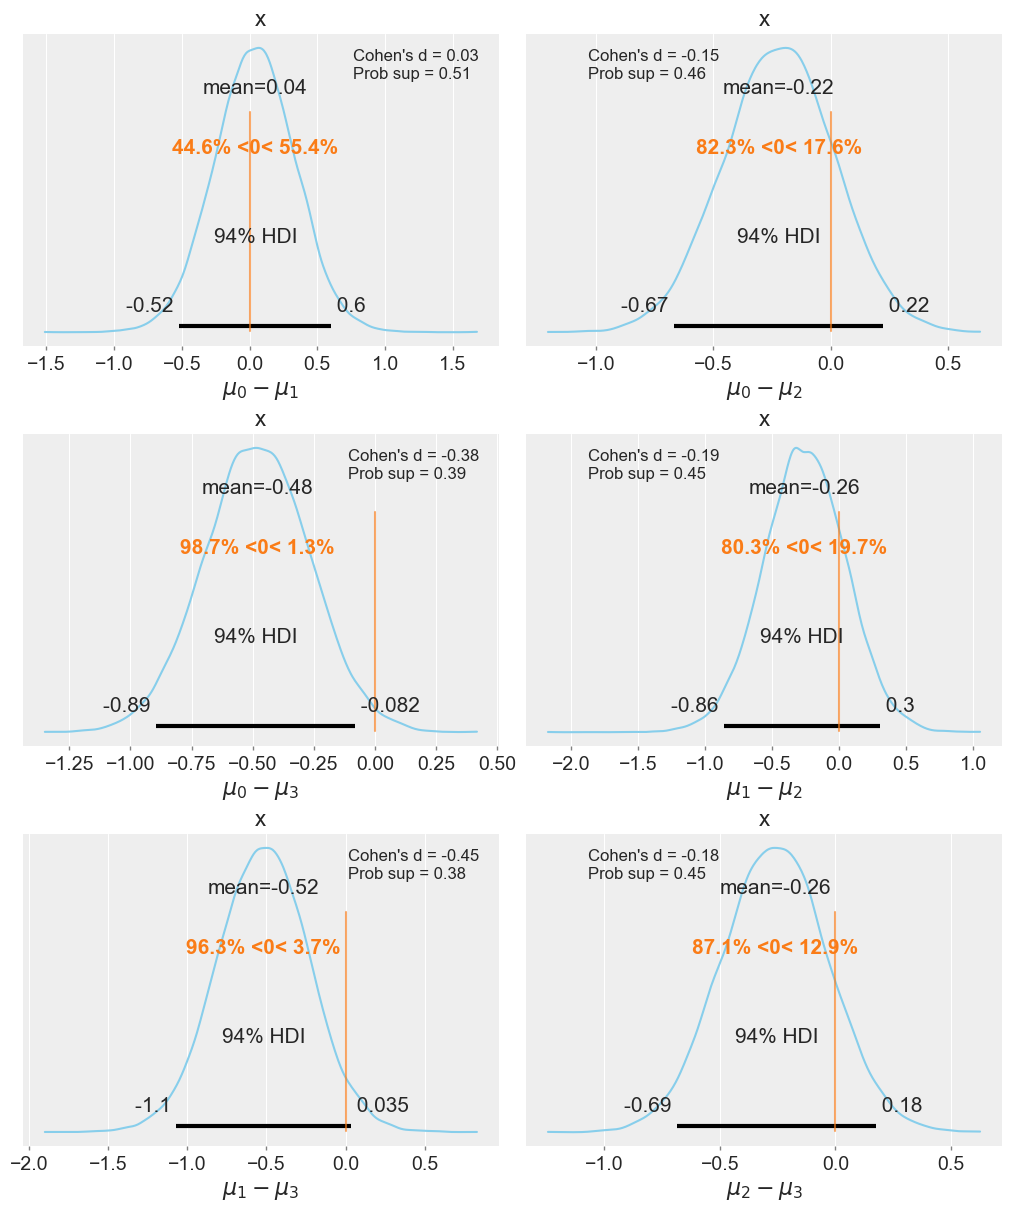

In [16]:
dist = dist = stats.norm()
_, ax = plt.subplots(3, 2, figsize=(10, 12), constrained_layout=False)

comparisons = [(i,j) for i in range(len(set(idx))) for j in range(i+1, 4)]
pos = [(k,l) for k in range(3) for l in (0, 1)]

for (i,j), (k,l) in zip(comparisons, pos):
    print(f"{(i,j)=}, {(k,l)=}")
    # print(trace_cg["posterior"]["means"].shape)
    # means_diff = trace_cg["posterior"]["means"][:,:,i] - trace_cg["posterior"]["means"][:,:,j]
    # d_cohen = (means_diff / np.sqrt((trace_cg["posterior"]["sds"][:,:,i]**2 + trace_cg["posterior"]["sds"][:,:,j]**2) / 2)).mean()
    means_diff = trace_cg['means'][:, i] - trace_cg['means'][:, j]
    d_cohen = (means_diff / np.sqrt((trace_cg['sds'][:, i]**2 + trace_cg['sds'][:, j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))

    # # ヒストグラム、KDE plot
    pm.plot_posterior(means_diff, ref_val=0, ax=ax[k,l], color="skyblue", kind="kde")
    ax[k,l].plot(0, label=f"Cohen's d = {d_cohen:.2f} \nProb sup = {ps:.2f}", alpha=0)
    ax[k,l].set_xlabel(f"$\mu_{i}-\mu_{j}$", fontsize=16)
    ax[k,l].legend(loc=0, fontsize=12)
plt.tight_layout()
plt.show()
    

## 3.4 階層モデリング
ある都市にある３つの異なる水域から、水のサンプルを採取し鉛の濃度を測定する。
WHOの基準に対して、
- 上回る→０
- 下回る→１  

とする。

In [17]:
np.repeat([1,0], [2,5])

array([1, 1, 0, 0, 0, 0, 0])

In [18]:
N_samples = [30, 30, 30] # 各グループのサンプル総数
G_samples = [18, 18, 18] # 良質な水質のサンプル数 
G_samples = [3, 3, 3]
G_samples = [18, 3, 3]

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))

In [19]:
print(len(data)) # 1ループで30サンプル生成、３ループで90サンプル
print(len(group_idx))
group_idx


90
90


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, beta, alpha]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.

Sampling 4 chains for 100 tune and 2_000 draw iterations (400 + 8_000 draws total) took 9 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.887400759836067, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8931911729112935, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9446822802867062, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWar

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.73,1.92,0.24,6.33,4.10e-02,3.00e-02,2431.0,2656.0,1.0
beta,7.58,5.45,0.54,17.50,1.19e-01,8.70e-02,2315.0,2371.0,1.0
theta[0],0.52,0.09,0.35,0.69,1.00e-03,1.00e-03,4072.0,4499.0,1.0
theta[1],0.14,0.06,0.04,0.25,1.00e-03,1.00e-03,5327.0,4423.0,1.0
theta[2],0.14,0.06,0.04,0.26,1.00e-03,1.00e-03,5842.0,4797.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


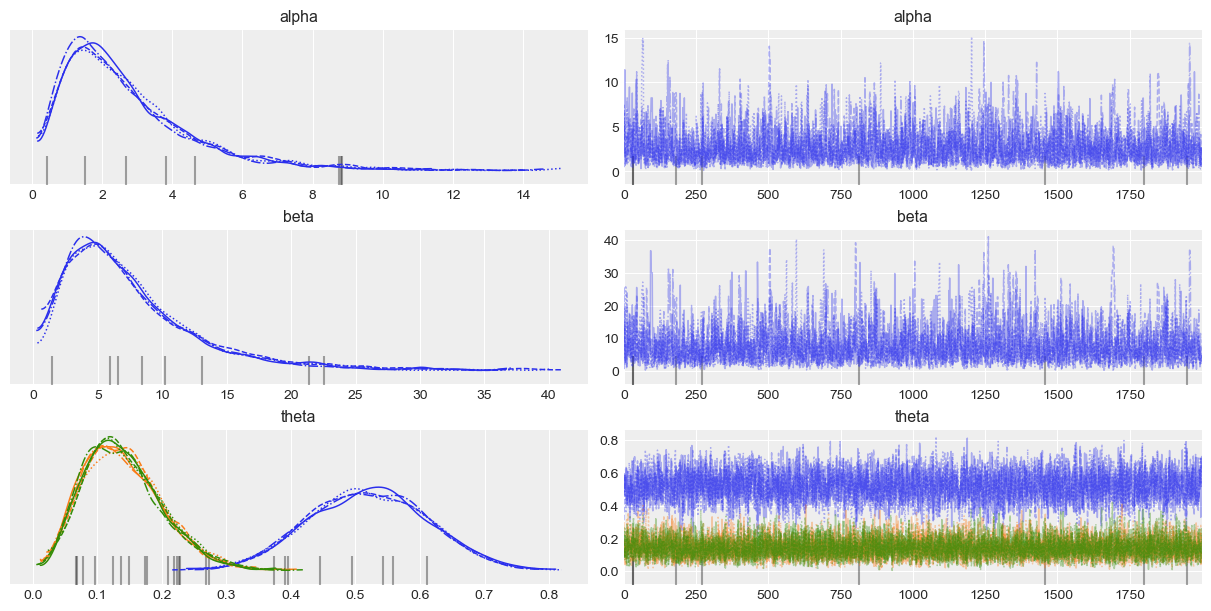

In [20]:
with pm.Model() as model_h:
    alpha = pm.HalfCauchy("alpha", beta=10)
    beta = pm.HalfCauchy("beta", beta=10)
    theta = pm.Beta("theta", alpha, beta, shape=len(N_samples))
    y = pm.Bernoulli("y", p=theta[group_idx], observed=data)

    trace_h = pm.sample(draws=2000, tune=100, discard_tuned_samples=True)

df = az.summary(trace_h)
display(df)
az.plot_trace(trace_h)
plt.savefig("img314_eg3.png")

In [21]:
# df.to_csv("code3.12-eg3.csv")
# df_tmp = pd.read_csv("code3.12.csv", index_col="Unnamed: 0")
# df_tmp.head()
for i in range(1,4):
    df = pd.read_csv(f"code3.12-eg{i}.csv", index_col="Unnamed: 0")
    print(f"----- eg{i} -----")
    display(df)
    print(f"theta0, theta1, theta2: {df['mean']['theta[0]']}, {df['mean']['theta[1]']}, {df['mean']['theta[2]']}")

----- eg1 -----


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,26.22,25.19,0.91,73.42,3.07e+00,2.93e+00,218.0,51.0,1.01
beta,17.62,16.96,0.72,48.41,2.02e+00,1.88e+00,219.0,51.0,1.01
theta[0],0.60,0.07,0.47,0.73,1.00e-03,1.00e-03,6560.0,5590.0,1.00
theta[1],0.60,0.07,0.47,0.73,1.00e-03,1.00e-03,5823.0,5596.0,1.00
theta[2],0.60,0.07,0.47,0.73,1.00e-03,1.00e-03,5843.0,5673.0,1.00


theta0, theta1, theta2: 0.598, 0.599, 0.598
----- eg2 -----


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,10.38,12.55,0.26,35.65,1.43e+00,1.08e+00,161.0,70.0,1.02
beta,89.28,109.96,3.33,335.10,1.12e+01,7.92e+00,179.0,138.0,1.02
theta[0],0.11,0.04,0.03,0.19,1.00e-03,1.00e-03,2235.0,2776.0,1.00
theta[1],0.11,0.04,0.03,0.19,1.00e-03,1.00e-03,2470.0,4376.0,1.00
theta[2],0.11,0.04,0.03,0.19,1.00e-03,1.00e-03,2180.0,3936.0,1.00


theta0, theta1, theta2: 0.108, 0.108, 0.107
----- eg3 -----


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.54,1.86,0.16,5.78,4.40e-02,3.40e-02,2202.0,2437.0,1.0
beta,7.05,5.34,0.60,16.32,1.20e-01,9.20e-02,2368.0,2676.0,1.0
theta[0],0.53,0.09,0.35,0.69,1.00e-03,1.00e-03,6265.0,5963.0,1.0
theta[1],0.14,0.06,0.04,0.25,1.00e-03,1.00e-03,5687.0,4670.0,1.0
theta[2],0.14,0.06,0.03,0.25,1.00e-03,1.00e-03,5664.0,4998.0,1.0


theta0, theta1, theta2: 0.526, 0.137, 0.137


### $\theta$の事前分布を出力する

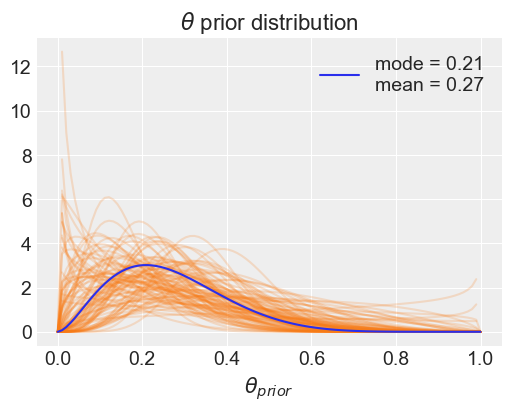

In [22]:
x = np.linspace(0, 1, 100)

plt.figure(figsize=(5,4))
for i in np.random.randint(0, len(trace_h), size=100):
    pdf = stats.beta(trace_h["alpha"][i], trace_h["beta"][i]).pdf(x)
    plt.plot(x, pdf, "C1", alpha=0.2)

dist = stats.beta(trace_h["alpha"].mean(), trace_h["beta"].mean())
pdf = dist.pdf(x)
mode = x[np.argmax(pdf)]
mean = dist.moment(1)

plt.plot(x, pdf, label=f"mode = {mode:.2f}\nmean = {mean:.2f}")
plt.legend()
plt.xlabel(r"$\theta_{prior}$")
plt.title(r"$\theta$ prior distribution")
plt.savefig("img315.png")

↑ $\theta$の事前分布をプロットした。だけ。。